### Data Cleaning 

---
### About data
As remote work continues to shape modern workplaces, understanding its effects on mental health, stress levels, and job satisfaction is crucial. This synthetic dataset is designed to simulate real-world trends and provide a structured foundation for analysis on how work location—remote, hybrid, and onsite—impacts employees across various industries.

With 5,000 AI-generated records, this dataset serves as a valuable resource for HR professionals, researchers, and data analysts looking to explore the relationship between work flexibility and employee well-being in a controlled, risk-free environment.

#### Key Features:

*  Work Location Insights – Remote, Hybrid, and Onsite comparisons
*  Stress & Mental Health Factors – Simulated self-reported stress levels & conditions
*  Social Isolation Ratings – Employees’ perception of workplace connectivity
*  Job Satisfaction Trends – Modeled patterns of employee satisfaction

##### Dataset Overview:
This dataset has been synthetically generated to mirror workplace trends and does not contain real-world data. It is intended for educational purposes, exploratory analysis, and data science practice.

##### Columns Description:
* Employee_ID – Unique identifier for each synthetic employee
* Age – Modeled age of the employee
* Gender – Simulated gender representation
* Job_Role – Assigned job role
* Industry – Simulated industry category
* Work_Location – Work setting: Remote, Hybrid, or Onsite
* Stress_Level – Modeled self-reported stress level (Low, Medium, High)
* Mental_Health_Condition – Synthetic responses for mental health conditions (e.g., Anxiety, Depression)
* Social_Isolation_Rating – Simulated rating (1-5) on workplace isolation perception
* Satisfaction_with_Remote_Work – Modeled employee satisfaction with remote work (Satisfied, Neutral, Unsatisfied

---

When conducting your initial analysis, you may notice discrepancies in your data, such as:

 * Missing values
* Spelling errors
* Duplicate entries
* Outliers

To ensure accurate and meaningful visualizations, it's essential to clean your data. But how do you go about it?

#### What is data cleaning?

Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset

In [3]:
#imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#load data

data=pd.read_csv('Impact_of_Remote_Work_on_Mental_Health.csv')

In [ ]:
#first 10  lines
data.head(10)

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
5,EMP0006,59,Non-binary,Sales,IT,31,Hybrid,39,3,4,High,NaN,No,Increase,5,Unsatisfied,1,NaN,Average,South America
6,EMP0007,31,Prefer not to say,Sales,IT,24,Remote,51,7,3,Low,Anxiety,Yes,Decrease,5,Neutral,3,Daily,Poor,Asia
7,EMP0008,42,Non-binary,Data Scientist,Manufacturing,6,Onsite,54,7,3,Medium,Depression,No,Decrease,5,Satisfied,4,NaN,Average,North America
8,EMP0009,56,Prefer not to say,Data Scientist,Healthcare,9,Hybrid,24,4,2,High,NaN,Yes,Decrease,2,Unsatisfied,4,Daily,Poor,Europe
9,EMP0010,30,Female,HR,IT,28,Hybrid,57,6,1,Low,Depression,Yes,Decrease,2,Neutral,1,Weekly,Poor,North America


In [5]:
#strucuture of data
data.shape

(5000, 20)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

We can already see that Physical_Activity and Mental_Health_Condition columns do not  have the same number of non-null values as the total number of rows therefore there is some missing data

In [ ]:
data.describe()

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40.995000,17.810200,39.614600,7.559000,2.984200,2.993800,3.007800
std,11.296021,10.020412,11.860194,4.636121,1.410513,1.394615,1.399046
min,22.000000,1.000000,20.000000,0.000000,1.000000,1.000000,1.000000
25%,31.000000,9.000000,29.000000,4.000000,2.000000,2.000000,2.000000
50%,41.000000,18.000000,40.000000,8.000000,3.000000,3.000000,3.000000
75%,51.000000,26.000000,50.000000,12.000000,4.000000,4.000000,4.000000
max,60.000000,35.000000,60.000000,15.000000,5.000000,5.000000,5.000000


#### **Step 1: Remove duplicate or irrelevant observations**


- **First**, always start by **showing the duplicates**:
  ```python
  data[data.duplicated(keep=False)]

* Check if the duplicates signify anything meaningful. If you decide to keep them, you can flag them by adding a new column:
   ```python
  data['is_duplicate'] = data.duplicated()

* If it’s just repeated data with no added value, then you can remove the duplicates:
  ```python
   data = data.drop_duplicates()

* This always depends on the type of data you are working with. For example:

   - In transaction data, duplicates might be valid.

   - In user registration forms, duplicates might indicate errors.

   - In surveys, you might want to analyze repeat responses differently.

In [ ]:
data.duplicated().sum()

0

since we do not have any duplicates we don't have to do anything

#### **Step 2: Fix structural errors**


Structural errors occur when the format, naming, or layout of your dataset is inconsistent or incorrect. Here's what to check:

#####  Key Things to Look Out For:

- **Column Names Should Make Sense**  
  Ensure that each column name is meaningful, clear, and follows a consistent naming convention.  
  Example:
  - Wrong naming: `col1`, `Unnamed: 0`, `value2`
  - Correct naming: `user_id`, `transaction_date`, `purchase_amount`

- **Categorical Data Should Have Consistent Naming**  
  Check for typos, inconsistent casing, or multiple versions of the same category.  
  Example:
  - Wrong naming: `male`, `Male`, `MALE`, `mle`
  -  Correct naming:`Male`, `Female`, `Other`

  You can standardize values like this:
  ```python
  data['gender'] = data['gender'].str.strip().str.lower()
- **Split Columns If Needed**
  Sometimes one column contains multiple pieces of information that should be separated
  ```python
  data[['first_name', 'last_name']] = data['full_name'].str.split(' ', 1, expand=True)


In [ ]:
categorical_cols = data.select_dtypes(include=["object", "category"]).columns

for col in categorical_cols:
    unique_values = data[col].unique()
    print(f"Unique values in '{col}': {unique_values}\n")

Unique values in 'Employee_ID': ['EMP0001' 'EMP0002' 'EMP0003' ... 'EMP4998' 'EMP4999' 'EMP5000']

Unique values in 'Gender': ['Non-binary' 'Female' 'Male' 'Prefer not to say']

Unique values in 'Job_Role': ['HR' 'Data Scientist' 'Software Engineer' 'Sales' 'Marketing' 'Designer'
 'Project Manager']

Unique values in 'Industry': ['Healthcare' 'IT' 'Education' 'Finance' 'Consulting' 'Manufacturing'
 'Retail']

Unique values in 'Work_Location': ['Hybrid' 'Remote' 'Onsite']

Unique values in 'Stress_Level': ['Medium' 'High' 'Low']

Unique values in 'Mental_Health_Condition': ['Depression' 'Anxiety' nan 'Burnout']

Unique values in 'Access_to_Mental_Health_Resources': ['No' 'Yes']

Unique values in 'Productivity_Change': ['Decrease' 'Increase' 'No Change']

Unique values in 'Satisfaction_with_Remote_Work': ['Unsatisfied' 'Satisfied' 'Neutral']

Unique values in 'Physical_Activity': ['Weekly' nan 'Daily']

Unique values in 'Sleep_Quality': ['Good' 'Poor' 'Average']

Unique values in 'Region

There are no naming  errors in the dataset

#### **Step 3: Filter unwanted outliers**


Outliers are data points that significantly differ from other observations. They can skew statistical analyses and machine learning models if not addressed properly. Here’s how to deal with them.

##### 1. Identifying Outliers

###### Methods to Identify Outliers:
- **Statistical methods**:
  - **Z-Score**: Data points with a Z-score greater than 3 (or less than -3) are often considered outliers.
  - **IQR (Interquartile Range)**: Outliers are typically outside of the range `Q1 - 1.5 * IQR` to `Q3 + 1.5 * IQR`.

  ```python
   import numpy as np

  # Example: Identifying outliers using Z-score
   from scipy import stats
   z_scores = stats.zscore(data['column_name'])
   outliers = data[np.abs(z_scores) > 3]

   # Example: Identifying outliers using IQR
   Q1 = data['column_name'].quantile(0.25)
   Q3 = data['column_name'].quantile(0.75)
   IQR = Q3 - Q1
   outliers = data[(data['column_name'] < (Q1 - 1.5 * IQR)) | (data['column_name'] > (Q3 + 1.5 * IQR))]

 - **Visualization methods**:
   - **Box Plots**: Box plots are useful to visually identify outliers.
   - **Scatter Plots**: Especially useful in multi-variable datasets.
   ```python
   import matplotlib.pyplot as plt
   data['column_name'].plot(kind='box')
   plt.show()

##### Handling outliers

- Remove Outliers

  If the outliers are errors or have no relevance to your analysis, you may choose to remove them
  ```python
      data_cleaned = data[(data['column_name'] >= lower_bound) & (data['column_name'] <= upper_bound)]

- Impute Outliers

  If the outliers represent valid data, you may decide to replace them with the mean, median, or a domain-specific value instead of removing them entirely.
  ```python
      data['column_name'] = np.where(data['column_name'] > upper_bound, data['column_name'].median(), data['column_name'])

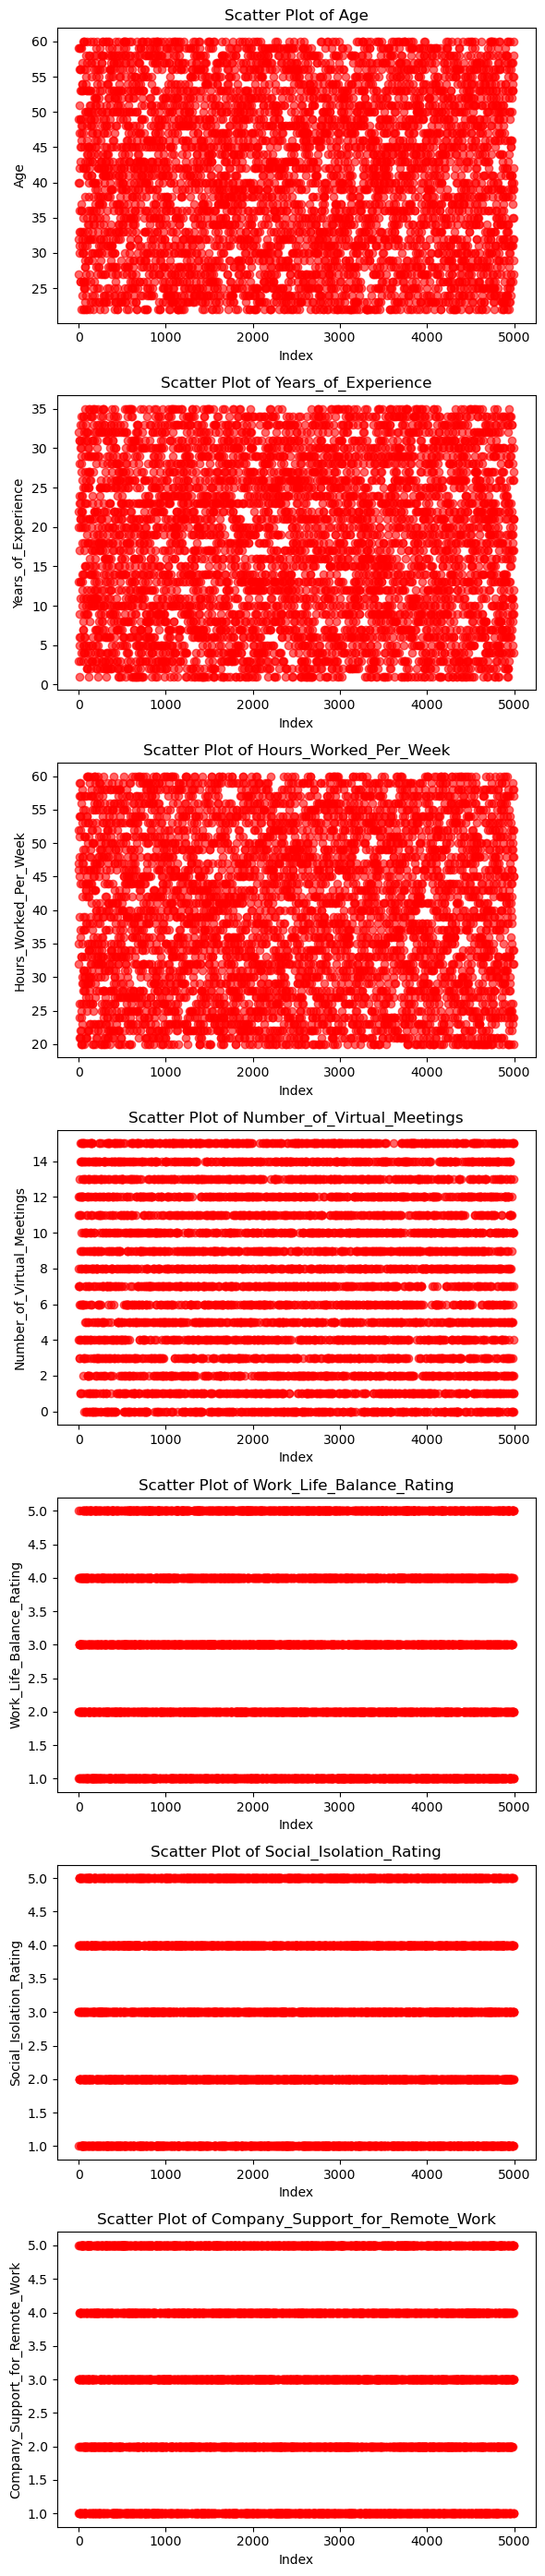

In [8]:
numeric_cols = data.select_dtypes(include=["number"]).columns
plt.figure(figsize=(6, len(numeric_cols) * 4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    plt.scatter(data.index, data[col], alpha=0.6, color="red")
    plt.xlabel("Index")
    plt.ylabel(col)
    plt.title(f"Scatter Plot of {col}")

plt.tight_layout()
plt.show()


In [13]:
Q1 = data[col].quantile(0.25)
Q3 = data[col].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

We can clearly see that our dataset doesnt have any outliers

#### **Step 4: Handle missing data**

Null values (or missing data) are common in real-world datasets and can pose challenges in analysis or model training. Properly handling nulls is crucial to ensure the quality of your data.

##### Identifying Null Values

Before handling null values, it’s important to identify where they exist in your dataset.

#### Methods to Identify Nulls:
- **Using `.isnull()`**: This method returns a DataFrame of the same shape, with `True` where the values are null.
- **Using `.sum()`**: To get a summary of null values in each column.
  ```python
   data.isnull().sum()
##### Handing nulls

- Removing Null Values
   If the number of null values is small(<5% of your total dataset>) you can remove rows or columns that contain null values
    ```python
     data_cleaned = data.dropna()
     data_cleaned = data.dropna(axis=1)

- Filling Null Values
   If the missing values are important, you can fill them with appropriate values like the mean, median, or mode of the column, or other domain-specific values
  -  Mean: For numerical columns with approximately normal distribution.
  -  Median: For numerical columns with skewed distributions.
  -  Mode: For categorical columns
  ```python
   data['column_name'] = data['column_name'].fillna(data['column_name'].median())
   data['column_name'] = data['column_name'].fillna(data['column_name'].mode()[0])
  
- Creating a Separate Category for Nulls
  In some cases, it’s useful to treat null values as a separate category, especially for categorical columns
  ```python
    data['column_name'] = data['column_name'].fillna('Unknown')

In [14]:
data.isna().sum()

Employee_ID                             0
Age                                     0
Gender                                  0
Job_Role                                0
Industry                                0
Years_of_Experience                     0
Work_Location                           0
Hours_Worked_Per_Week                   0
Number_of_Virtual_Meetings              0
Work_Life_Balance_Rating                0
Stress_Level                            0
Mental_Health_Condition              1196
Access_to_Mental_Health_Resources       0
Productivity_Change                     0
Social_Isolation_Rating                 0
Satisfaction_with_Remote_Work           0
Company_Support_for_Remote_Work         0
Physical_Activity                    1629
Sleep_Quality                           0
Region                                  0
dtype: int64

In [15]:
data['Mental_Health_Condition'].value_counts()

Mental_Health_Condition
Burnout       1280
Anxiety       1278
Depression    1246
Name: count, dtype: int64

In [16]:
data['Mental_Health_Condition'] = data['Mental_Health_Condition'].fillna('Unknown')

In [17]:
data['Physical_Activity'].value_counts()

Physical_Activity
Weekly    1755
Daily     1616
Name: count, dtype: int64

In [18]:
data['Physical_Activity'] = data['Physical_Activity'].fillna('Not Specified')

We added a new category for both columns since we are dealing with mental health data. People are more likely not to disclose certain information about themselves, so instead of replacing the null values with existing data, we decided to introduce a separate category to represent the missing values

### **Step 5 : Changing column data type**

- Check the Current Data Type Before changing the data type
  ```python
     data.dtypes
- Convert a column to a numeric type (int, float)
  ```PYTHON
      data['column_name'] = data['column_name'].astype(float)
- Convert a column to categorical
   ```python
      data['column_name'] = data['column_name'].astype('category')
- Convert a date column to datetime
   ```python
      data['column_name'] = pd.to_datetime(data['column_name'])


In [22]:
data.dtypes

Employee_ID                          object
Age                                   int64
Gender                               object
Job_Role                             object
Industry                             object
Years_of_Experience                   int64
Work_Location                        object
Hours_Worked_Per_Week                 int64
Number_of_Virtual_Meetings            int64
Work_Life_Balance_Rating              int64
Stress_Level                         object
Mental_Health_Condition              object
Access_to_Mental_Health_Resources    object
Productivity_Change                  object
Social_Isolation_Rating               int64
Satisfaction_with_Remote_Work        object
Company_Support_for_Remote_Work       int64
Physical_Activity                    object
Sleep_Quality                        object
Region                               object
dtype: object

We do not need to change our datatypes in this dataset

In [19]:
data.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,Not Specified,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,Not Specified,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,Unknown,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


Now that our data is clean we can mode to data visualization